# Основные настройки. Импорт, Константы, Функции.

<hr><hr>

## Импорт библиотек

<hr>

In [1]:
import pandas as pd
import numpy as np
import random

import datetime

In [2]:
import matplotlib.pyplot as plt

#векторный формат отображения 
%config InlineBackend.figure_format = 'svg'
plt.style.use("ggplot") 

import seaborn as sns

In [3]:
# Дополнительные глобальные настройки
# Настройка пандас чтоб показывал все столбцы
pd.set_option('display.max_columns', None)

%matplotlib inline

In [4]:
# sklearn_______________________________________________
from sklearn.model_selection import train_test_split, \
                                    RandomizedSearchCV

# Библиотеки оценки
from sklearn.metrics import mean_absolute_error as mae # MAE
from sklearn.metrics import mean_squared_error as mse # MSE

# Масштабирование
from sklearn.preprocessing import StandardScaler # 

from sklearn.utils import shuffle # Перемешивание данных

In [5]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [6]:
# Модели машинного обучения--------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# catboost
from catboost import CatBoostRegressor

<hr><hr>

## Константы   ▼

<hr>

In [7]:
#Размеры графиков
FIGSIZE = (10,5)

In [8]:
#воспроизводимые случайные значения
RANDOM_STATE = 220523

In [9]:
# Имена файлов с данными
DATA_CSV = ["data_arc_new.csv", # данные об электродах
            "data_bulk_new.csv", # данные о подаче сыпучих материалов (объём)
            "data_bulk_time_new.csv", # *—* данные о подаче сыпучих материалов (время)
            "data_gas_new.csv", # данные о продувке сплава газом
            "data_temp_new.csv", # результаты измерения температуры
            "data_wire_new.csv", # данные о проволочных материалах (объём)
            "data_wire_time_new.csv", # данные о проволочных материалах (время)
           ]

In [10]:
# Наименование данных
DATA_NAME = ["Данные об электродах",
             "Данные о подаче сыпучих материалов (объём)",
             "Данные о подаче сыпучих материалов (время)",
             "Данные о продувке сплава газом",
             "Результаты измерения температуры",
             "Данные о проволочных материалах (объём)",
             "Данные о проволочных материалах (время)",
           ]

In [11]:
# Ссылка расположения данных
DATA_LINK = "https://code.s3.yandex.net/datasets/"

In [12]:
data = {}

for i in range(len(DATA_CSV)):
    try: data[i] = [DATA_NAME[i], DATA_LINK + DATA_CSV[i], "datasets/" + DATA_CSV[i]]
    except: print("\n\n\n" + DATA_NAME[i] + " - данные ненайдены \n\n\n")
    
data

{0: ['Данные об электродах',
  'https://code.s3.yandex.net/datasets/data_arc_new.csv',
  'datasets/data_arc_new.csv'],
 1: ['Данные о подаче сыпучих материалов (объём)',
  'https://code.s3.yandex.net/datasets/data_bulk_new.csv',
  'datasets/data_bulk_new.csv'],
 2: ['Данные о подаче сыпучих материалов (время)',
  'https://code.s3.yandex.net/datasets/data_bulk_time_new.csv',
  'datasets/data_bulk_time_new.csv'],
 3: ['Данные о продувке сплава газом',
  'https://code.s3.yandex.net/datasets/data_gas_new.csv',
  'datasets/data_gas_new.csv'],
 4: ['Результаты измерения температуры',
  'https://code.s3.yandex.net/datasets/data_temp_new.csv',
  'datasets/data_temp_new.csv'],
 5: ['Данные о проволочных материалах (объём)',
  'https://code.s3.yandex.net/datasets/data_wire_new.csv',
  'datasets/data_wire_new.csv'],
 6: ['Данные о проволочных материалах (время)',
  'https://code.s3.yandex.net/datasets/data_wire_time_new.csv',
  'datasets/data_wire_time_new.csv']}

<hr><hr>

## Функции

<hr>

In [13]:
# Создадим ДатаФрейм для тестирования
test_assert_df = {1:["1_1", "1_2", "1_3", "1_4", "1_5", "1_6", "1_7"],
                  2:["2_1", "2_2", "2_3", "2_4", "2_5", "2_6", "2_7"],
                  3:["3_1", "3_2", "3_3", "3_4", "3_5", "3_6", "3_7"],
                  4:[0, 1, 2, 3, 4, 5, 6],
                  5:[0.1, 1.3, 2.5, 3.6, 4.7, 5.8, 6.9]
                 }
test_assert_df = pd.DataFrame(test_assert_df)
test_assert_df

,1,2,3,4,5
0,1_1,2_1,3_1,0,0.1
1,1_2,2_2,3_2,1,1.3
2,1_3,2_3,3_3,2,2.5
3,1_4,2_4,3_4,3,3.6
4,1_5,2_5,3_5,4,4.7
5,1_6,2_6,3_6,5,5.8
6,1_7,2_7,3_7,6,6.9


### data_info

In [14]:
def data_info(df):
    """
    Принимает DataFrame и выводит основную информацию
    - 5 случайных строк
    - Выводит info
    -
    """
    # Проверяем является ли получаемая переменная DataFram
    if not isinstance(df, pd.DataFrame):
        return print("Неверный тип передоваемых данных!!! Должен быть DataFram")
    
    # Выведем случайные строки
    print("\033[1m\033[34m\033[48m{}\033[0m".format("Случайные данные:\n"))
    display(df.sample (n=5))
    
    # Выведем общую информацию
    print("\033[1m\033[34m\033[48m{}\033[0m".format("\nОбщая информация:\n"))
    display(df.info())
    
    # Посчитаем количество NAN в столбцах
    print("\033[1m\033[34m\033[48m{}\033[0m".format("\nКоличество NaN в данных:\n"))
    print(df.isna().sum())
    
    # 
    display(df.describe())

In [15]:
# Проверяем функцию
print("\033[1m\033[34m\033[48m{}\033[0m".format("Результат выполнения функции\n"))
data_info(test_assert_df)

Результат выполнения функции

Случайные данные:



,1,2,3,4,5
3,1_4,2_4,3_4,3,3.6
4,1_5,2_5,3_5,4,4.7
1,1_2,2_2,3_2,1,1.3
6,1_7,2_7,3_7,6,6.9
2,1_3,2_3,3_3,2,2.5



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       7 non-null      object 
 1   2       7 non-null      object 
 2   3       7 non-null      object 
 3   4       7 non-null      int64  
 4   5       7 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 408.0+ bytes


None


Количество NaN в данных:

1    0
2    0
3    0
4    0
5    0
dtype: int64


,4,5
count,7.000000,7.000000
mean,3.000000,3.557143
std,2.160247,2.438481
min,0.000000,0.100000
25%,1.500000,1.900000
50%,3.000000,3.600000
75%,4.500000,5.250000
max,6.000000,6.900000


### is not int

In [16]:
# Проверим сколько значений имеют дробную часть
def is_not_int(df):
    """
    Функция принимает датафрейм и выводит сколько значений не int в столбцах 
    в виде словаря имя [столбца : сколько значений не int]
    если в столбце данные не числовые выводит сообщение "имя столбца : is not numeric"
    """
    column_not_int = {}
    
    for i in df:
        try:
            is_not_int = 0
            is_not_int += (df[i] % 1 > 0).sum()
            column_not_int[i] = is_not_int
        except:
            print(i, ' : is not numeric')
    print("Всего не целых чисел в датафрейме = ", column_not_int)

In [17]:
is_not_int(test_assert_df)

1  : is not numeric
2  : is not numeric
3  : is not numeric
Всего не целых чисел в датафрейме =  {4: 0, 5: 7}


### percen ▼

In [18]:
# Функция пасчета процентиля
def percen(d, left, right): 
    # d - Данные, left - левая граница процентиля, right - правая граница процентиля

    percen = d[d > 0].dropna() #отбросим 0 и Nan
    percen_lim = [np.percentile(percen, left), np.percentile(percen, 100 - right)]

    data_percen_lim = percen[(percen > percen_lim[0])&(percen < percen_lim[1])]

    print('Процентиль', left + right,'%')
    print('Диапозон', int(percen_lim[0]),'->', int(percen_lim[1]))
    print(data_percen_lim.count(),'-->', round(data_percen_lim.dropna().count() / (percen.count()/100), 1),'%')
    print('--------------------------')

## Классы

### DataProcessing (Класс предобработки данных)

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

# класс предобработки данных
class DataProcessing():

    def arc_0(self, X):
        """
        Вычисление полной мощьности, время начала и окончания нагрева
        """
        X=X[0]
        
        begin_heat = pd.to_datetime(X["Начало нагрева дугой"])
        end_heat = pd.to_datetime(X["Конец нагрева дугой"])

        # Вычеслим время нагрева в секундах
        second_heat = (end_heat - begin_heat).astype("timedelta64[s]").astype("int32")
        
        # Вычеслим полную мощьность
        power = X["Активная мощность"] * second_heat + \
                X["Реактивная мощность"] * second_heat
        
        power = pd.DataFrame({"key" : X["key"],
                              "Общая мощьность" : power,
                             })
        
        # Считаем общую мощьность по партиям и количество включений
        power_inf = power.groupby("key").agg(["sum", "count", "median"])
        
        # уберем "Общая мощьность"
        # создадим столбец с ключем партии
        power_inf["key"] = power_inf.index
        
        power_inf = power_inf["Общая мощьность"][["sum", "count", "median"]]
        
        # Переименуем колонки
        power_inf.columns = ["Общая мощьность по парти", 
                             "Кол. включений электродов", 
                             "Медиана по партии",
                            ]

        # создадим столбец с ключем партии
        power_inf["key"] = power_inf.index
        
        # Отбросим строки с nan, так как в этой таблице ключевые показатели
        power_inf.dropna(how='all')
        
        # Запишем обработанные данные в новую таблицу
        X_new = pd.DataFrame([])
        X_new = power_inf[["key", "Кол. включений электродов", "Общая мощьность по парти",
                           "Медиана по партии",
                          ]]

        return X_new
    
    def bulk_1(self, X):
        """
        данные о подаче сыпучих материалов (объём)
        """
        X=X[1]
        
        X = X.groupby("key").agg(["sum"])
        X.columns = [tup[0] if tup[0] else tup[1] for tup in X.columns]
        return X
    
    def bulk_time_2(self, X):
        """
        данные о подаче сыпучих материалов (время)
        приведем данные к типу datatime
        """
        X=X[2]
        columns = X.columns[1:]
        
        X[columns].astype('datetime64[ns]')
        
        return X[columns].astype('datetime64[ns]')

    def gas_3(self, X):
        """
        данные о продувке сплава газом
        Меняем Nan на 0
        """
        X=X[3]
        return X.fillna(0) # Заполним Nan на 0
    
    def temp_4(self, y):
        """
        результаты измерения температур
        Необходимо предсказвать конечную температуру
        Является y
        """
        y=y[4]
        y_new = pd.DataFrame([])
        
        y = y.groupby("key").agg(["max"])
        y_new["key"] = y.index
        
        # Первое измерение температуры
        first_temp = all_data[4].groupby("key").agg("min")["Время замера"]
        first_temp = pd.DataFrame(first_temp)
        first_temp = first_temp.merge(all_data[4], 
                                      on="Время замера", 
                                      how="left"
                                     )

        first_temp.set_axis(["key", "Время замера", "Начальный замер"], 
                            axis = "columns", 
                            inplace = True
                           )
        #first_temp.sample(2)

        # Последнее измерение температуры
        last_temp_time = all_data[4].groupby("key").agg("max")["Время замера"]

        last_temp = pd.DataFrame(last_temp_time)

        last_temp = last_temp.merge(all_data[4], 
                                    on="Время замера", 
                                    how="left"
                                   )

        last_temp.set_axis(["key", "Время замера", "Последний замер"], 
                           axis = "columns", 
                           inplace = True
                          )
        #last_temp.sample(2)
        
        y_new["Начальный замер"] = first_temp["Начальный замер"]
        y_new["Конечная температура"] = last_temp["Последний замер"]

        return y_new
    
    def wire_5(self, X):
        """
        данные о проволочных материалах (объём)
        Оставим только новые фичи
        """
        X=X[5]
        for i in X.columns:
            na = X[i].isna().sum()
            if na > 30:
                X2 = X.drop([i], axis=1)
        X = X2.fillna(0)
        
        X["Сумма по партиям (объём) проволки"] = X[X.columns[1:]].sum(axis=1)
        X["Число подач проволки"] = X[X.columns[1:]][X[X.columns[1:]]>0].count(axis=1)
        
        # Запишем новые фичи в новую таблицу
        X_new = pd.DataFrame([])
        X_new = X[["key", "Сумма по партиям (объём) проволки", "Число подач проволки", "Wire 1", "Wire 2"]]
        
        return X_new
    
    def wire_time_6(self, X):
        """
        данные о проволочных материалах (время)
        приведем данные к типу datatime
        """
        X=X[6]
        columns = X.columns[1:]
        
        X[columns].astype('datetime64[ns]')
        
        return X[columns].astype('datetime64[ns]')
    
# добавим функцию для новой фичи
    def arc_0_new_0(self, X):
        """
        новая фича время нагрева дуги в секундах
        """
        X=X[0]

        begin_heat = pd.to_datetime(X["Начало нагрева дугой"])
        end_heat = pd.to_datetime(X["Конец нагрева дугой"])
        
        second_heat = pd.DataFrame({"key" : X["key"]})
        
        # Вычеслим время нагрева в секундах
        second_heat["Продолжительность нагрева дуги в сек."] = (end_heat - begin_heat)\
                                                        .astype("timedelta64[s]").astype("int32")

        second_heat = second_heat.groupby("key").agg(["sum"])
        second_heat.columns = [tup[0] if tup[0] else tup[1] for tup in second_heat.columns]
        
        second_heat["key"] = second_heat.index
        
        return second_heat

<hr><hr>

## Загрузка данных

<hr>

In [20]:
# Загрузим в переменную all_data все данные
all_data = []

for i in range(len(DATA_CSV)):
    try:
        all_data.append(pd.read_csv(data[i][1]))
    except:
        all_data.append(pd.read_csv(DATA_LINK + DATA_CSV[2]))

### Рассмотрим как загрузились данные

In [21]:
for i in range(len(DATA_NAME)):

    print("+++++++++++++++++++++++++++++++++++++++++++\n" + \
          "\033[1m\033[34m\033[48m{}\033[0m".format(data[i][0]) + \
          "\n+++++++++++++++++++++++++++++++++++++++++++")
    print("- колличество партий" , len(all_data[i]['key'].unique())) # считаем о скольки партиях есть информация

    display(all_data[i])

+++++++++++++++++++++++++++++++++++++++++++
Данные об электродах
+++++++++++++++++++++++++++++++++++++++++++
- колличество партий 3214


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543


+++++++++++++++++++++++++++++++++++++++++++
Данные о подаче сыпучих материалов (объём)
+++++++++++++++++++++++++++++++++++++++++++
- колличество партий 3129


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


+++++++++++++++++++++++++++++++++++++++++++
Данные о подаче сыпучих материалов (время)
+++++++++++++++++++++++++++++++++++++++++++
- колличество партий 3129


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,2019-09-06 11:54:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 11:49:45,NaN,2019-09-06 11:45:22,2019-09-06 11:40:06
3125,3238,NaN,NaN,2019-09-06 12:26:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 12:18:35,NaN,2019-09-06 12:31:49,2019-09-06 12:26:52
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:06:00,NaN,NaN,NaN,NaN,NaN,2019-09-06 15:01:44,NaN,2019-09-06 14:58:15,2019-09-06 14:48:06
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:24:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-06 16:07:29,2019-09-06 16:01:34


+++++++++++++++++++++++++++++++++++++++++++
Данные о продувке сплава газом
+++++++++++++++++++++++++++++++++++++++++++
- колличество партий 3239


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103


+++++++++++++++++++++++++++++++++++++++++++
Результаты измерения температуры
+++++++++++++++++++++++++++++++++++++++++++
- колличество партий 3216


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


+++++++++++++++++++++++++++++++++++++++++++
Данные о проволочных материалах (объём)
+++++++++++++++++++++++++++++++++++++++++++
- колличество партий 3081


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


+++++++++++++++++++++++++++++++++++++++++++
Данные о проволочных материалах (время)
+++++++++++++++++++++++++++++++++++++++++++
- колличество партий 3081


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-09-06 11:33:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-09-06 12:18:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-06 14:36:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-06 15:33:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr><hr>

## EDA

<hr>

### 0 Данные об электродах

In [22]:
data_info(all_data[0])

Случайные данные:



,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
1030,223,2019-05-12 00:58:36,2019-05-12 01:02:12,0.465821,0.361719
8426,1831,2019-07-10 12:10:33,2019-07-10 12:12:03,0.410100,0.272061
5324,1155,2019-06-16 10:44:13,2019-06-16 10:47:51,0.281754,0.195620
12196,2649,2019-08-16 07:22:47,2019-08-16 07:24:27,0.700373,0.493758
871,184,2019-05-10 15:36:27,2019-05-10 15:40:33,0.554008,0.357421



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


None


Количество NaN в данных:

key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64


,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [23]:
# посмотрим на отрицательные значения
all_data[0][all_data[0]["Реактивная мощность"]<0]

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


In [24]:
is_not_int(all_data[0])
print("Всего строк: ", len(all_data[0]["key"]))

Начало нагрева дугой  : is not numeric
Конец нагрева дугой  : is not numeric
Всего не целых чисел в датафрейме =  {'key': 0, 'Активная мощность': 14876, 'Реактивная мощность': 14876}
Всего строк:  14876


#### Вывод:

1. Значения Nan в данных остутсвуют.
2. Данные в столбцах **Начало нагрева дугой** и **Конец нагрева дугой** необходимо перевести к типу **data**.
3. Уточнить в чем измеряется **Активная мощность** и **Реактивная мощность** гВт, кВт или МВт?
4. В столбце **Реактивная мощность** имеются отридцательные значения - это явная ошибка в данных реактивная мощность <b style="color:#ff0000">не может быть отридцательной</b>.

### Данные о подаче сыпучих материалов (объём)

In [25]:
data_info(all_data[1])

Случайные данные:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
2910,3016,NaN,NaN,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,NaN,76.0,104.0
874,910,NaN,NaN,302.0,NaN,NaN,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,NaN
2920,3028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,NaN,150.0,156.0
321,344,NaN,NaN,NaN,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,131.0,203.0
2467,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,NaN,146.0,104.0



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


None


Количество NaN в данных:

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [26]:
# Проверим сколько значений действительно float64
is_not_int(all_data[1])

print("Всего строк: ", len(all_data[0]["key"]))

Всего не целых чисел в датафрейме =  {'key': 0, 'Bulk 1': 0, 'Bulk 2': 0, 'Bulk 3': 0, 'Bulk 4': 0, 'Bulk 5': 0, 'Bulk 6': 0, 'Bulk 7': 0, 'Bulk 8': 0, 'Bulk 9': 0, 'Bulk 10': 0, 'Bulk 11': 0, 'Bulk 12': 0, 'Bulk 13': 0, 'Bulk 14': 0, 'Bulk 15': 0}
Всего строк:  14876


#### Вывод:

1. Необходимо перевести данные к типу **int32**
2. Столбцы **Bulk 2, Bulk 5, Bulk 7, Bulk 8, Bulk 9, Bulk 13** содержат менее 100 значений.

### 2 Данные о подаче сыпучих материалов (время)

In [27]:
data_info(all_data[2])

Случайные данные:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1501,1558,NaN,NaN,NaN,2019-07-01 01:06:08,NaN,NaN,NaN,NaN,NaN,2019-07-01 01:12:27,NaN,2019-07-01 01:15:23,NaN,2019-07-01 01:12:27,2019-07-01 01:06:08
2785,2890,NaN,NaN,2019-08-25 02:48:51,NaN,NaN,2019-08-25 02:48:51,NaN,NaN,NaN,NaN,NaN,2019-08-25 03:25:34,NaN,2019-08-25 03:16:03,2019-08-25 03:09:07
1101,1149,NaN,NaN,2019-06-16 07:08:58,2019-06-16 06:49:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-16 07:08:58,NaN,2019-06-16 06:58:33,2019-06-16 06:49:06
2034,2106,2019-07-27 06:23:07,2019-07-27 06:23:07,NaN,2019-07-27 07:50:22,2019-07-27 06:45:47,NaN,2019-07-27 06:40:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,1512,NaN,NaN,2019-06-29 05:35:33,NaN,NaN,2019-06-29 05:33:04,NaN,NaN,NaN,NaN,NaN,2019-06-29 05:28:33,NaN,2019-06-29 05:20:27,2019-06-29 05:12:08



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


None


Количество NaN в данных:

key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [28]:
# Посмотрим за какой периуд данные
for i in all_data[2]:
    print(i, "   ", pd.to_datetime(all_data[2][i]).max() - \
                    pd.to_datetime(all_data[2][i]).min()
         )

key     0 days 00:00:00.000003240
Bulk 1     124 days 15:28:46
Bulk 2     97 days 20:08:04
Bulk 3     125 days 15:46:27
Bulk 4     124 days 16:06:33
Bulk 5     118 days 02:57:35
Bulk 6     125 days 21:15:13
Bulk 7     121 days 00:56:48
Bulk 8     0 days 00:00:00
Bulk 9     93 days 21:13:58
Bulk 10     121 days 02:09:20
Bulk 11     123 days 05:19:50
Bulk 12     126 days 03:37:13
Bulk 13     118 days 23:42:41
Bulk 14     126 days 06:11:43
Bulk 15     126 days 06:12:32


#### Вывод:

1. Данные предоставлены за 126 дней.
2. В столбцах **Bulk 2, Bulk 5, Bulk 7, Bulk 8, Bulk 9, Bulk 13** менее 100 значений.

### 3 Данные о продувке сплава газом

In [29]:
all_data[3]

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103


In [30]:
data_info(all_data[3])

Случайные данные:



,key,Газ 1
2640,2643,11.585950
776,779,9.979814
635,638,19.798236
2420,2423,9.200765
1127,1130,18.986822



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


None


Количество NaN в данных:

key      0
Газ 1    0
dtype: int64


,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [31]:
is_not_int(all_data[3])
print("Всего строк: ", len(all_data[3]["key"]))

Всего не целых чисел в датафрейме =  {'key': 0, 'Газ 1': 3239}
Всего строк:  3239


#### Вывод:

1. С данными все впорядке
2. Уточнить в чем измеряются данные колонки **Газ 1**

### 4 Результаты измерения температуры

In [32]:
data_info(all_data[4])

Случайные данные:



,key,Время замера,Температура
16050,2871,2019-08-24 11:40:46,NaN
11678,2083,2019-07-26 08:44:43,1587.0
1164,206,2019-05-11 09:44:17,1584.0
9497,1692,2019-07-05 16:26:14,1591.0
7863,1407,2019-06-25 10:46:58,1594.0



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


None


Количество NaN в данных:

key                0
Время замера       0
Температура     3427
dtype: int64


,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


In [33]:
is_not_int(all_data[4])
print("Всего строк: ", len(all_data[4]["key"]))

Время замера  : is not numeric
Всего не целых чисел в датафрейме =  {'key': 0, 'Температура': 0}
Всего строк:  18092


In [34]:
# Посмотрим за какой периуд данные
print("Данные за: ", pd.to_datetime(all_data[4]["Время замера"]).max() - \
                     pd.to_datetime(all_data[4]["Время замера"]).min()
      )

Данные за:  126 days 06:28:01


#### Вывод:

1. Предоставлены данные за 126 дней.
2. Столбец **Время замера** необходимо перевести к типу **datatime**.

### 5 Данные о проволочных материалах (объём)

In [35]:
data_info(all_data[5])

Случайные данные:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2311,2435,57.089764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,3136,70.150077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,125,120.382073,NaN,260.131897,NaN,NaN,65.310967,NaN,NaN,NaN
1592,1672,95.097595,75.068245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1569,1649,65.145600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


None


Количество NaN в данных:

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


#### Вывод:

1. Данными в столбцах **Wire 1** и **Wire 2** имеют более 100 значений

### 6 Данные о проволочных материалах (время)

In [36]:
data_info(all_data[6])

Случайные данные:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
2504,2637,2019-08-15 17:19:33,2019-08-15 17:15:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2857,3010,2019-08-29 16:25:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2088,2186,2019-07-30 09:32:21,2019-07-30 09:26:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
886,946,2019-06-09 06:13:50,2019-06-09 06:09:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2143,2253,2019-08-01 14:54:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


None


Количество NaN в данных:

key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [37]:
# Посмотрим за какой периуд данные
for i in all_data[6]:
    print(i, "   ", pd.to_datetime(all_data[6][i]).max() - \
                    pd.to_datetime(all_data[6][i]).min()
         )

key     0 days 00:00:00.000003240
Wire 1     126 days 06:03:47
Wire 2     125 days 18:20:06
Wire 3     121 days 02:40:17
Wire 4     97 days 11:57:28
Wire 5     0 days 00:00:00
Wire 6     103 days 04:24:51
Wire 7     17 days 04:36:17
Wire 8     93 days 21:26:59
Wire 9     121 days 19:33:56


#### Вывод:
1. Все данные 
кроме столбца **key** необходимо перевести в **datetime**.
2. Данных в столбцах **Wire 3** - **Wire 9** менее 100 значений.
3. Данные предоставлены за периуд 126 дней

### Расмотрим графически данные всех партий

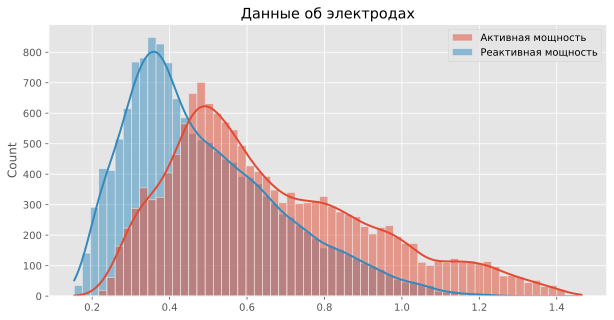

In [38]:
# Посмотрим на распределение мощности подоваемых на электроды
plt.figure(figsize=FIGSIZE)
d = pd.DataFrame({"key" : all_data[0]["key"],
                  "Активная мощность" : all_data[0]["Активная мощность"], 
                  "Реактивная мощность" : all_data[0]["Реактивная мощность"][all_data[0]["Реактивная мощность"]>0]
                 })
d = d[["Активная мощность", "Реактивная мощность"]]

plt.title(DATA_NAME[0])
sns.histplot(data=d, kde=True, line_kws={'linewidth':2});

In [39]:
all_data[3]

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103


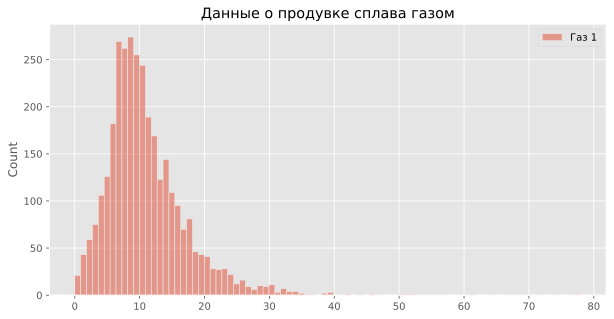

In [40]:
# Посмотрим на распределение Данных о продувке сплава газом
plt.figure(figsize=FIGSIZE)
d = pd.DataFrame({"Газ 1" : all_data[3]["Газ 1"]
                 })

plt.title(DATA_NAME[3])
sns.histplot(data=d, line_kws={'linewidth':2});

- Считаю что значения более 35 анномалии и их стоит отбросить чтоб не путать модель. Уточнить в чем могла быть причина этих анномали, возможно большая подача газа была связанна с хим составом сырья.

In [41]:
all_data[4]

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
...,...,...,...
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN


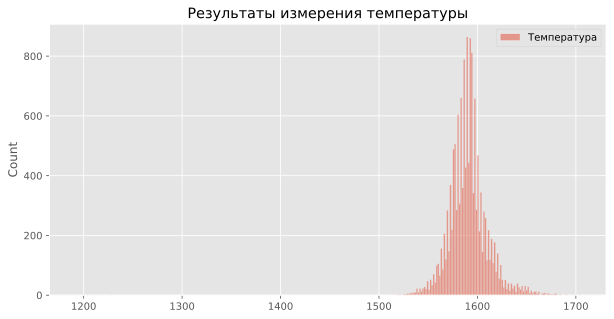

In [42]:
# Посмотрим на Результаты измерения температуры
plt.figure(figsize=FIGSIZE)
d = pd.DataFrame({"Температура" : all_data[4]["Температура"]
                 })
plt.title(DATA_NAME[4])
sns.histplot(data=d, line_kws={'linewidth':2});

In [43]:
all_data[4]["Температура"].median()

1590.0

- Температура имее медиану 1590 градусов и график нормально распределен с большим хвостом в сторону уменьшения. Считаю стоит отбросить данные в диапозоне 1550-1630 градусов.

### Расмотрим графически данные 1-й случайной партии

In [44]:
rnd_parties = random.randint(0, all_data[0]["key"].max())
print("Партия №" + str(rnd_parties))

Партия №1848


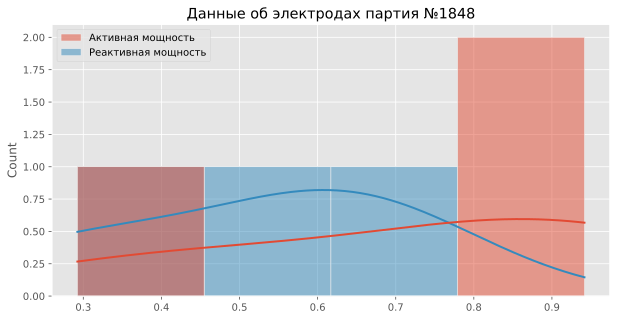

In [45]:
plt.figure(figsize=FIGSIZE)
d = pd.DataFrame({"key" : all_data[0]["key"],
                  "Активная мощность" : all_data[0]["Активная мощность"], 
                  "Реактивная мощность" : all_data[0]["Реактивная мощность"][all_data[0]["Реактивная мощность"]>0]
                 })
d = d[["Активная мощность", "Реактивная мощность"]][d["key"] == rnd_parties]

plt.title(DATA_NAME[0]+' партия №'+ str(rnd_parties))
sns.histplot(data=d, kde=True, line_kws={'linewidth':2});

In [46]:
print("Данные партии №" + str(rnd_parties))
d

Данные партии №1848


,Активная мощность,Реактивная мощность
8502,0.413628,0.292440
8503,0.941664,0.590184
8504,0.846186,0.678322


In [47]:
for i in range(0,7):
    print("\033[1m\033[34m\033[48m{}\033[0m".format(DATA_NAME[i]));
    display(all_data[i][all_data[i]["key"] == rnd_parties]);

Данные об электродах


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
8502,1848,2019-07-11 01:04:42,2019-07-11 01:08:26,0.413628,0.292440
8503,1848,2019-07-11 01:12:32,2019-07-11 01:14:48,0.941664,0.590184
8504,1848,2019-07-11 01:31:55,2019-07-11 01:34:34,0.846186,0.678322


Данные о подаче сыпучих материалов (объём)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1786,1848,NaN,NaN,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,101.0,203.0


Данные о подаче сыпучих материалов (время)


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
1786,1848,NaN,NaN,NaN,2019-07-11 01:08:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-11 01:08:45,NaN,2019-07-11 01:15:08,2019-07-11 01:34:51


Данные о продувке сплава газом


,key,Газ 1
1845,1848,5.551631


Результаты измерения температуры


,key,Время замера,Температура
10335,1848,2019-07-11 01:04:32,1600.0
10336,1848,2019-07-11 01:12:22,1587.0
10337,1848,2019-07-11 01:31:45,1590.0
10338,1848,2019-07-11 01:39:16,1593.0


Данные о проволочных материалах (объём)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1758,1848,60.465601,15.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Данные о проволочных материалах (время)


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
1758,1848,2019-07-11 01:15:08,2019-07-11 01:08:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color= 'dodgerblue'>**Заметки:**</font>

- Уточнить данные по **первичному химическому составу** подающегося расплавленной стали.
- Необходимо знать как изменяется после каждой операции **химического состав** чтобы определить оптимальный объем добавок.
- Уточнить **Целевой химический состав стали**.
- Уточнить какая оптимальная **температура плавки на выходе**.
- Необходимо рассматривать данные по партиям.
- Необходимо проверить имеются ли данные о всех партиях.

#### Данные об электродах

In [48]:
# время начала и окончания нагрева в секундах
begin_heat = pd.to_datetime(all_data[0]["Начало нагрева дугой"])
end_heat = pd.to_datetime(all_data[0]["Конец нагрева дугой"])

In [49]:
# Вычеслим время нагрева в секундах
s_heat = (end_heat - begin_heat).astype("timedelta64[s]").astype("int32")

s_heat.sample(5)

11184    320
5456     167
2349     161
430      132
6294      79
dtype: int32

In [50]:
# Вычислим общую мощьность
power = all_data[0]["Активная мощность"] * s_heat +\
    all_data[0]["Реактивная мощность"] * s_heat

power.sample(5)

7178    116.646627
2277    380.492164
2110     31.048500
5201    353.025782
7948    140.771088
dtype: float64

In [51]:
# посчитаем сколько значений меньше 0
(power<0).sum()

1

In [52]:
# Добавим общую мощьность в таблицу
all_data[0]["Общая мощьность"] = power

In [53]:
# Посмотрим в какой партии получилось отридцательное значение
display(all_data[0][all_data[0]["Общая мощьность"]<0])

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность,Общая мощьность
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924,-77910.42922


Комментарий
<b style="color:#ff0000">
- В партии <b>2116</b> Реактивная мощность имеет нереальное значение - 715.479924. Следует удалить всю партию!
</b>

In [54]:
data_eda_0 = all_data[0][all_data[0]["key"] != 2116]

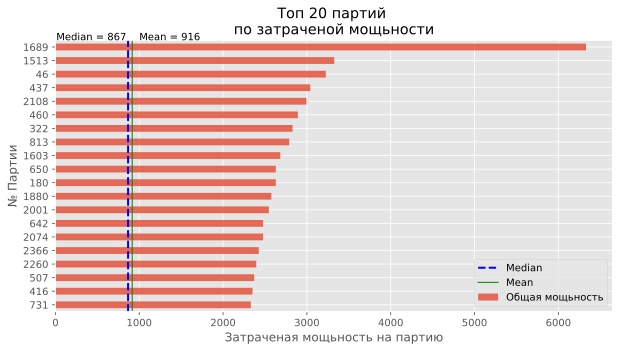

In [55]:
# График Затрат электроэнергии по партиям
median = data_eda_0.groupby("key")["Общая мощьность"].sum().median()
mean = data_eda_0.groupby("key")["Общая мощьность"].sum().mean()

# График Затрат электроэнергии по партиям
data_eda_0.groupby("key")["Общая мощьность"].sum() \
    .sort_values(ascending=False) \
    .head(20) \
    .sort_values() \
    .plot(kind="barh",
          figsize=FIGSIZE,
          title="Общая мощьность по партиям",
          alpha=0.8,
         )

plt.xlabel("Затраченая мощьность на партию")
plt.ylabel("№ Партии")

plt.title("Топ 20 партий \nпо затраченой мощьности")

# Линия медианы
plt.axvline (x=median, 
             linewidth=2, 
             color='b',
             linestyle="--",
             label='Median',
            )
# Линия ссредней
plt.axvline (x=mean, 
             linewidth=1, 
             color='g',
             linestyle="-",
             label='Mean',
            )

plt.text(10, 19.5, 
         "Median = " + str(round(median)), 
         fontsize=10
        )
plt.text(1000, 19.5, 
         "Mean = " + str(round(mean)), 
         fontsize=10,
        )

plt.legend()
plt.show()

Комментарий
- Присутствуют выбросы более чем в 6 раз превышающие медианное значение.

  Стоит рассмотреть возможность отброисть партии которые превышают показатель в 2150

Ниже посмотрим сколько таких значений.

In [56]:
hig_power_batches = (data_eda_0.groupby("key")["Общая мощьность"].sum() > 2150).sum()
batches = data_eda_0["key"].unique()

print("Колличество партий с потреблением энергии более 2150 =", \
hig_power_batches, "партии", \
f'{hig_power_batches / (len(batches) / 100) :.1f} % от всех партий')

Колличество партий с потреблением энергии более 2150 = 32 партии 1.0 % от всех партий


- При обучении модели попробуем убрать эти значения и как это повлияло на качество обучения.

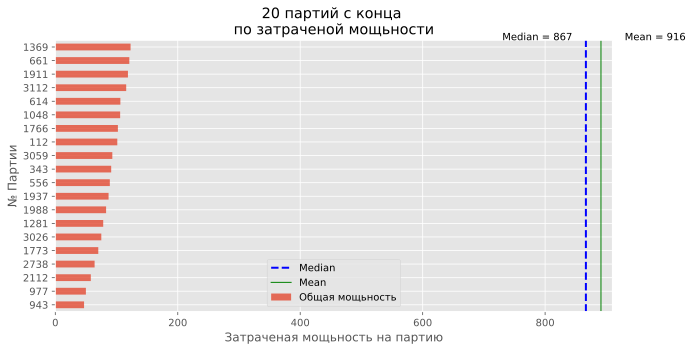

In [57]:
# График Затрат электроэнергии по партиям
data_eda_0.groupby("key")["Общая мощьность"].sum() \
    .sort_values(ascending=True) \
    .head(20) \
    .sort_values() \
    .plot(kind="barh",
          figsize=FIGSIZE,
          title="Общая мощьность по партиям",
          alpha=0.8,
         )

plt.xlabel("Затраченая мощьность на партию")
plt.ylabel("№ Партии")

plt.title("20 партий с конца \nпо затраченой мощьности")

# Линия медианы
plt.axvline (x=all_data[0].groupby("key")["Общая мощьность"].sum().median(), 
             linewidth=2, 
             color='b',
             linestyle="--",
             label='Median',
            )
# Линия медианы
plt.axvline (x=all_data[0].groupby("key")["Общая мощьность"].sum().mean(), 
             linewidth=1, 
             color='g',
             linestyle="-",
             label='Mean',
            )

plt.text(730, 19.5, 
         "Median = " + str(round(median)), 
         fontsize=10
        )
plt.text(930, 19.5, 
         "Mean = " + str(round(mean)), 
         fontsize=10,
        )
plt.legend()
plt.show()

Комментарий
- Имеются очень низкие показатели потребления энергии, возможно ошибка измерения.

Ниже посмотрим сколько таких значений.

In [58]:
low_power_batches = (data_eda_0.groupby("key")["Общая мощьность"].sum() < 155).sum()

print("Колличество партий с потреблением энергии менее 155 =", \
low_power_batches, "партии", \
f'{low_power_batches / (len(batches) / 100) :.1f} % от всех партий')

Колличество партий с потреблением энергии менее 155 = 31 партии 1.0 % от всех партий


- При обучении модели попробуем убрать эти значения и посмотрим как это повлияло на качество обучения.

#### Данные о подаче сыпучих материалов (объём)

In [59]:
columns = all_data[1].columns

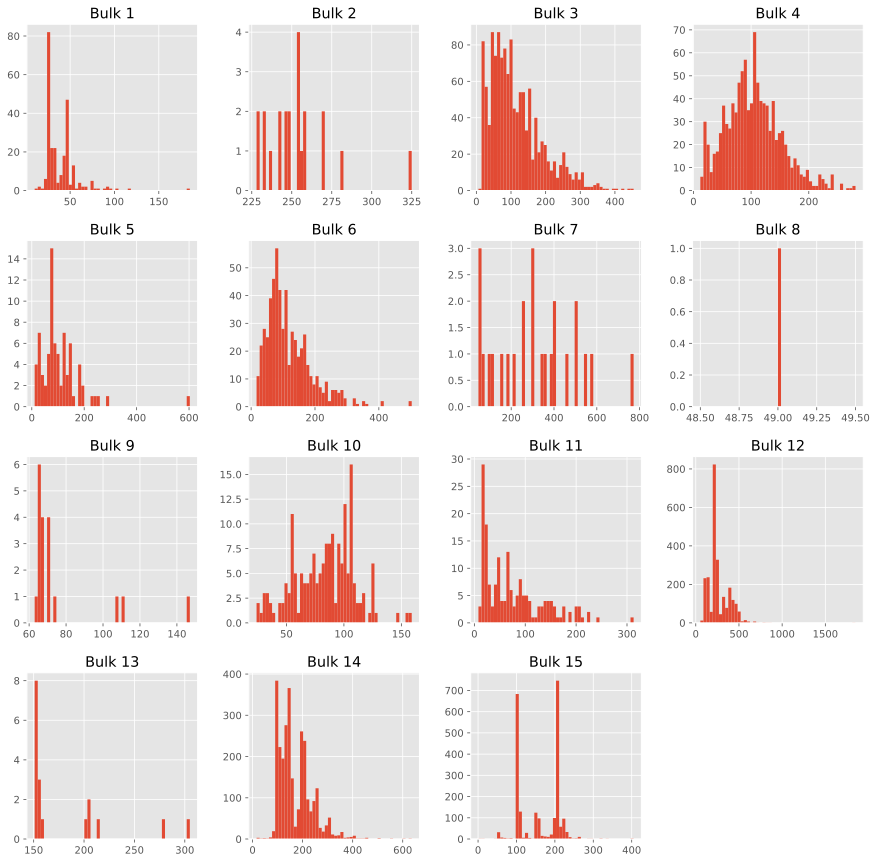

In [60]:
all_data[1][columns[1:]].hist(bins=50, 
                          figsize=(15,15),
                         );

**Вывод:**
- Значения в данных варьируются от 8 до 750 в разных колонках, необходимо будет отмасштабировать.
- от колонки **Bulk 8** придется избавиться слишком мало значений.

#### Температура

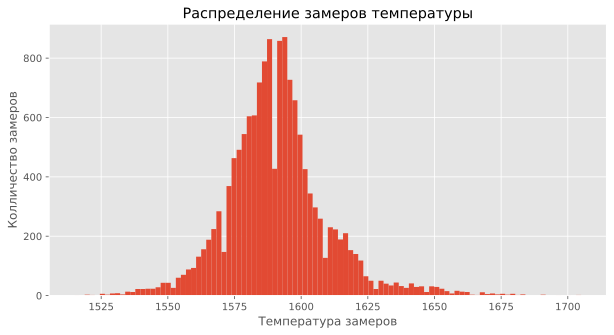

In [61]:
# График температуры, отбросим значения меньше температуры плавки стали
all_data[4]["Температура"][all_data[4]["Температура"] > 1300] \
    .hist(bins=100, 
          figsize=FIGSIZE,
         )
plt.title("Распределение замеров температуры")
plt.xlabel("Температура замеров")
plt.ylabel("Колличество замеров");

In [62]:
# Посчитаем колличество партий с анномальными замерами температуры
print("Кол. партий с аномально низким замером температуры =", \
      len(all_data[4]["key"][all_data[4]["Температура"] < 1300].unique()), \
      "\nКол. партий с аномально высоким замером температуры =", \
      len(all_data[4]["key"][all_data[4]["Температура"] > 1650].unique())
     )

Кол. партий с аномально низким замером температуры = 5 
Кол. партий с аномально высоким замером температуры = 69


**Вывод:**
- Считаю стоит отбросить партии с анномалиями при обучение модели т.к. похоже на яный сбой при замере температуры.

#### Данные о проволочных материалах (объём)¶

In [63]:
columns = all_data[5].columns

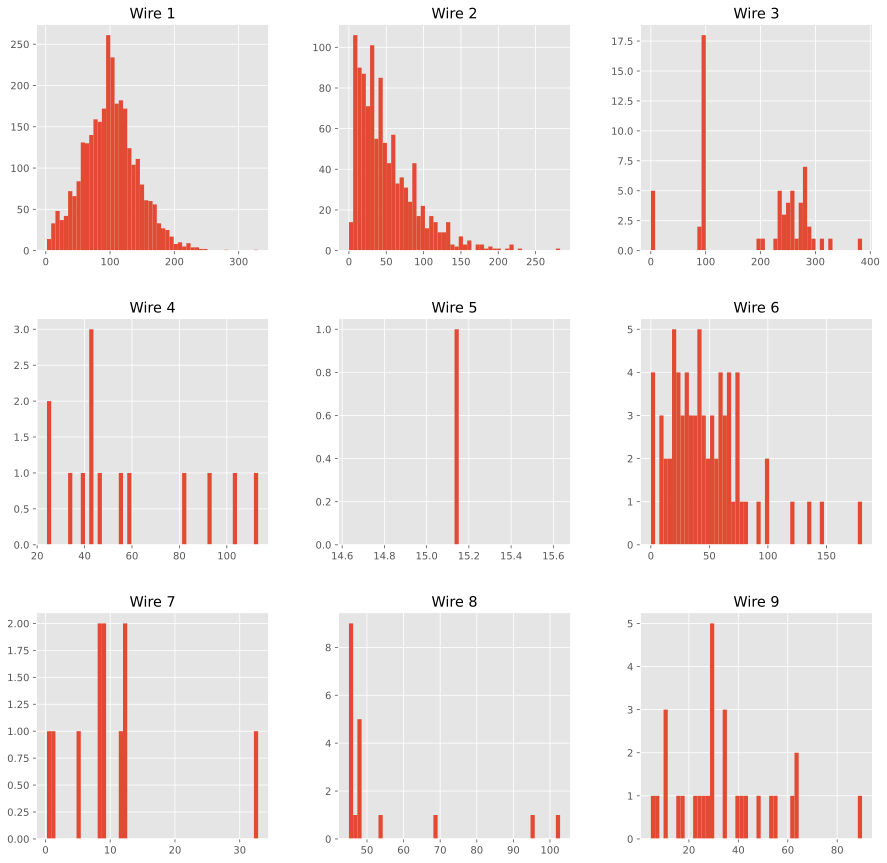

In [64]:
all_data[5][columns[1:]].hist(bins=50, 
                         figsize=(15,15),
                         );

**Вывод:**
- Значения в данных варьируются от 1 до 250 в разных колонках, необходимо будет отмасштабировать.
- От колонки **Wire 5** придется избавиться слишком мало значений.

# Этап  №2

## Подготовка выборки

### Предобработка данных

In [65]:
# предобработаем данные
arc_0 = DataProcessing().arc_0(all_data)
arc_0.reset_index(drop = True, inplace = True)

bulk_1 = DataProcessing().bulk_1(all_data)
gas_3 = DataProcessing().gas_3(all_data)
temp_4 = DataProcessing().temp_4(all_data)
wire_5 = DataProcessing().wire_5(all_data)

In [66]:
#V2 предобработаем новые фичи время работы электрода
arc_0_new_0 = DataProcessing().arc_0_new_0(all_data)

In [67]:
# Ключевой признак финальная температура
y = temp_4[["key", "Конечная температура"]]

#V2 уберем в которых нет признака финальная температу
y = y.dropna().reset_index(drop=True)
y.sample(3)

,key,Конечная температура
1638,1653,1610.0
2114,2131,1586.0
2164,2181,1621.0


In [68]:
# Запишем список для объединения
prepare_data = [bulk_1, gas_3, temp_4, wire_5]

#### Объеденяем данные в итоговую таблицу

In [69]:
# объеденим все данные в итоговую таблицу
full_prepare_data = arc_0.copy()

for i in prepare_data:
    full_prepare_data = full_prepare_data.merge(i, 
                                                how="inner", 
                                                on="key"
                                               )

In [70]:
#V2 Присоеденим новыю фичу "Продолжительность нагрева дуги в сек."

# Исправим проблему с индексом
arc_0_new_0 = arc_0_new_0.set_index("key")

full_prepare_data = full_prepare_data.merge(arc_0_new_0, 
                                            how="inner", 
                                            on="key"
                                           )

In [71]:
full_prepare_data = full_prepare_data.dropna()
full_prepare_data = full_prepare_data.drop(["key","Bulk 1","Bulk 2","Bulk 3","Bulk 11","Bulk 13",
                                           "Bulk 7","Bulk 14","Bulk 9","Bulk 6","Bulk 4",
                                           ], axis=1)

In [72]:
display(full_prepare_data.sample(3))

,Кол. включений электродов,Общая мощьность по парти,Медиана по партии,Bulk 5,Bulk 8,Bulk 10,Bulk 12,Bulk 15,Газ 1,Начальный замер,Конечная температура,Сумма по партиям (объём) проволки,Число подач проволки,Wire 1,Wire 2,Продолжительность нагрева дуги в сек.
1543,7,1129.606503,137.095057,0.0,0.0,0.0,412.0,208.0,12.381865,1612.0,1610.0,130.197601,2,130.197601,0.00,1055
1600,6,854.231597,110.129153,0.0,0.0,91.0,512.0,204.0,15.056920,1559.0,1591.0,195.353591,3,180.273591,15.08,900
1374,4,764.147209,197.576234,0.0,0.0,58.0,256.0,205.0,4.827375,1573.0,1592.0,125.096397,2,125.096397,0.00,632


In [73]:
full_prepare_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329 entries, 0 to 2328
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Кол. включений электродов              2329 non-null   int64  
 1   Общая мощьность по парти               2329 non-null   float64
 2   Медиана по партии                      2329 non-null   float64
 3   Bulk 5                                 2329 non-null   float64
 4   Bulk 8                                 2329 non-null   float64
 5   Bulk 10                                2329 non-null   float64
 6   Bulk 12                                2329 non-null   float64
 7   Bulk 15                                2329 non-null   float64
 8   Газ 1                                  2329 non-null   float64
 9   Начальный замер                        2329 non-null   float64
 10  Конечная температура                   2329 non-null   float64
 11  Сумм

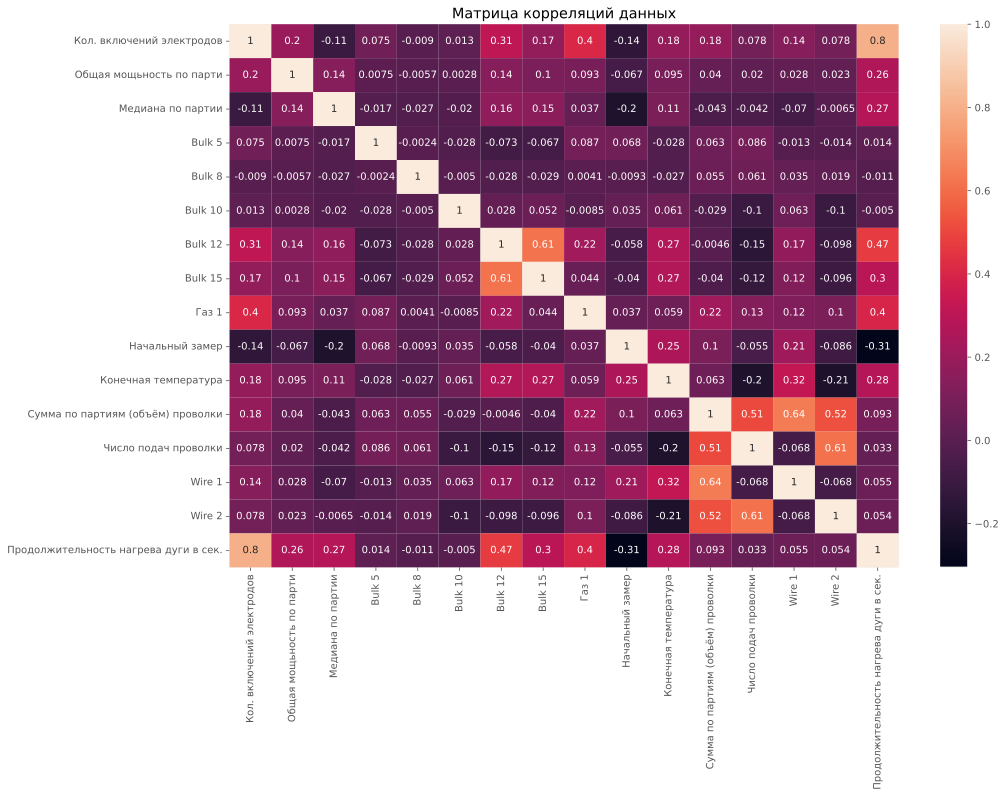

In [74]:
# Рассмотрим корреляцию между данными
plt.figure(figsize=(15,10))
plt.title('Матрица корреляций данных')
sns.heatmap(full_prepare_data.corr(), 
            annot = True
           )
plt.show()

**Вывод:**
1. Больше всего корелляция с ключевым параметром прослеживается у параметра **Сумма по партиям (обьём) проволки**.
2. **Медиана по партии** (мощьность) имеет отридцательную корелляцию с ключевым параметром.
3. Корелляция с ключевым параметром удовлетворительна, можно пробовать обучить разные модели.

In [75]:
full_prepare_data

,Кол. включений электродов,Общая мощьность по парти,Медиана по партии,Bulk 5,Bulk 8,Bulk 10,Bulk 12,Bulk 15,Газ 1,Начальный замер,Конечная температура,Сумма по партиям (объём) проволки,Число подач проволки,Wire 1,Wire 2,Продолжительность нагрева дуги в сек.
0,5,1073.106367,223.601952,0.0,0.0,0.0,206.0,154.0,29.749986,1571.0,1613.0,60.059998,2,60.059998,0.00000,1098
1,4,669.971795,154.256765,0.0,0.0,0.0,206.0,154.0,12.555561,1581.0,1602.0,96.052315,2,96.052315,0.00000,811
2,5,1009.813548,139.555098,0.0,0.0,0.0,205.0,153.0,28.554793,1596.0,1599.0,91.160157,2,91.160157,0.00000,655
3,4,957.652251,240.246478,0.0,0.0,0.0,207.0,154.0,18.841219,1601.0,1625.0,89.063515,2,89.063515,0.00000,741
4,4,715.251398,142.632940,0.0,0.0,0.0,203.0,152.0,5.413692,1576.0,1602.0,98.352796,3,89.238236,9.11456,869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,4,963.819993,203.482702,0.0,0.0,90.0,256.0,223.0,7.125735,1570.0,1591.0,89.150879,2,89.150879,0.00000,723
2325,6,1132.209704,121.055203,0.0,0.0,122.0,256.0,226.0,9.412616,1554.0,1591.0,114.179527,2,114.179527,0.00000,940
2326,3,1143.189452,362.770812,0.0,0.0,0.0,230.0,226.0,6.271699,1571.0,1589.0,103.134723,3,94.086723,9.04800,569
2327,5,810.454998,182.990336,0.0,0.0,101.0,206.0,207.0,14.953657,1591.0,1594.0,118.110717,2,118.110717,0.00000,750


#### Разделем выборку на Train и Test

In [76]:
# Перемешаем данные перед разделением
data_shuffled = shuffle(full_prepare_data, 
                        random_state=RANDOM_STATE
                       )
# рассмотрим результат
data_shuffled.head()

,Кол. включений электродов,Общая мощьность по парти,Медиана по партии,Bulk 5,Bulk 8,Bulk 10,Bulk 12,Bulk 15,Газ 1,Начальный замер,Конечная температура,Сумма по партиям (объём) проволки,Число подач проволки,Wire 1,Wire 2,Продолжительность нагрева дуги в сек.
779,5,1587.611640,214.242024,0.0,0.0,0.0,0.0,0.0,8.635693,1571.0,1600.0,97.344002,2,97.344002,0.000000,1084
2221,8,1114.443949,93.851328,0.0,0.0,0.0,125.0,104.0,11.743407,1580.0,1589.0,126.374561,3,50.974560,75.400001,1056
1898,6,1711.178749,309.282313,0.0,0.0,0.0,517.0,105.0,8.937261,1543.0,1576.0,59.142723,2,59.142723,0.000000,1315
1310,5,1218.939191,187.955080,0.0,0.0,0.0,510.0,0.0,13.626387,1553.0,1594.0,151.304397,2,151.304397,0.000000,1013
463,4,590.015002,94.258935,0.0,0.0,0.0,285.0,225.0,7.133954,1571.0,1591.0,100.151993,2,100.151993,0.000000,702


In [77]:
# Разделим выборку
X = data_shuffled.drop(["Конечная температура"], 
                        axis=1
                      )

y = data_shuffled["Конечная температура"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=RANDOM_STATE
                                                   )
print("Размерность выборок для обучения:",
"\n\nОбучающая выборка:",
"\nX_train -->", X_train.shape,
"\ny_train -->", y_train.shape,
"\n\nТестовая выборка:",
"\nX_test -->", X_test.shape,
"\ny_test -->", y_test.shape,
)

Размерность выборок для обучения: 

Обучающая выборка: 
X_train --> (1863, 15) 
y_train --> (1863,) 

Тестовая выборка: 
X_test --> (466, 15) 
y_test --> (466,)


## Обучение

### Посчитаем **MAE** на случайных предсказаниях

In [78]:
# расчитаем значение MAE на случайных данных 
y_rnd = np.random.randint(y_train.min(), y_train.max(), len(y_train))

In [79]:
rnd_mae = round(mae(y_train, y_rnd))

In [80]:
print("MAE =", rnd_mae)

MAE = 28


Случайное предсказание на промежутке от минимума до максимума ошибается на **28** градуса.

### Обучение и выбор наилучшей модели

In [81]:
# Переменная в которой будем хранить все модели
models={}

#### LinearRegression

In [82]:
# Обучим модель
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

lin_reg_mae = round(mae(y_train, lin_reg.predict(X_train)))

In [83]:
# Запишем результат
models["LinearRegression"] = {"Name" : "LinearRegression",
                              "model" : lin_reg,
                              "score" : lin_reg_mae
                             }

In [84]:
print("Модель:", models["LinearRegression"]['Name'],"\nMAE = ", \
      round(models["LinearRegression"]["score"], 2))

Модель: LinearRegression 
MAE =  6


- без подбора параметров **MAE** = 6 (v2)

- **LinearRegression** Показал результат MAE = 8

#### GradientBoostingRegressor

In [85]:
# Обучим модель
random_gbr = GradientBoostingRegressor(random_state=RANDOM_STATE)

random_gbr.fit(X_train, y_train)

# Посчитаем MAE
random_gbr_mae = round(mae(y_train, random_gbr.predict(X_train)))

In [86]:
# Запишем результат
models["GradientBoostingRegressor"] = {"Name" : "GradientBoostingRegressor",
                                       "model" : random_gbr,
                                       "score" : random_gbr_mae
                                      }
print("Модель:", models["GradientBoostingRegressor"]['Name'],"\nMAE = ", \
      round(models["GradientBoostingRegressor"]["score"], 2))

Модель: GradientBoostingRegressor 
MAE =  5


- **GradientBoostingRegressor** Показал результат MAE = 5

In [117]:
#v2 подберем параметры для GradientBoostingRegressor
gradientboost = GradientBoostingRegressor(n_estimators = 300)

from sklearn.model_selection import RandomizedSearchCV

loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features}

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=gradientboost,
            param_distributions=hyperparameter_grid,
            cv=4, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


C:\Users\uraza\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:293: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(n_estimators=300),
                   n_iter=50, n_jobs=4,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

#### CatBoostRegressor <b style="color:#ff0000">Лучший результат!!!</b>

In [118]:
# Настроим CatBoostRegressor
cat = CatBoostRegressor(iterations=10000,
                        depth=4,
                        learning_rate=0.01,
                        thread_count=-1,
                        l2_leaf_reg=5,
                        loss_function='MAE',
                        boosting_type='Plain',
                        eval_metric='MAE',
                        random_state = RANDOM_STATE
                       )

In [119]:
# обучим CatBoostRegressor
cat.fit(X_train, y_train, verbose=False, plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [120]:
# Запишем результат
models["CatBoostRegressor"] = {"Name" : "CatBoostRegressor",
                               "model" : cat,
                               "score" : cat.best_score_['learn']
                              }
print("Модель:", models['CatBoostRegressor']['Name'],"\nMAE = ", \
      round(models['CatBoostRegressor']["score"]["MAE"], 2))

Модель: CatBoostRegressor 
MAE =  3.94


- **CatBoostRegressor** Показал хороший результат! MAE = 3.64 Лучший резудьтат

## Тестирование наилучшей модели

In [121]:
# Посчитаем MAE CatBoostRegressor
cat_boost_regr_mae = mae(y_test, models["CatBoostRegressor"]["model"].predict(X_test))

print("Модель:", models["CatBoostRegressor"]["Name"],"\nMAE = ",\
      round(cat_boost_regr_mae, 2))

Модель: CatBoostRegressor 
MAE =  6.66


In [122]:
# Посчитаем MAE для GradientBoostingRegressor
random_cv_mae = mae(y_test, models["GradientBoostingRegressor"]["model"].predict(X_test))

print("Модель:", models["GradientBoostingRegressor"]["Name"],"\nMAE = ",\
      round(random_cv_mae, 2))

Модель: GradientBoostingRegressor 
MAE =  6.59


### Вывод: ▼▼  GradientBoostingRegresso Лучший результат!!!

- 1. Модель CatBoostRegressor на тестировании ухудшела показатель MAE в 2 раза и составила **MAE = 6.65** (v2)
- 2. Модель GradientBoostingRegressor на тестировании ухудшела показатель MAE на тесте показала лучший результат **MAE = 6.59**

добавление одного параметра улучшило на 1.5 метрику для **GradientBoostingRegressor**